# Projectile motion

## Experiment and data analysis

This experiment is about the motion of a **ping pong ball** launched with a certain initial velocity and at some angle with respect to the horizontal direction. We record the video using a smartphone.

In [18]:
from IPython.display import Video
Video('./video/20191115_113217.mp4', width = 400)

Using the software [Tracker](https://physlets.org/tracker/) we can import the video and we can look at it frame by frame. In each frame we can obtain the coordinates of the center of the ping pong ball.

Since the rate at which the frames are acquired is known, the software allows to associate to each frame a value of the time elapsed since an initial instant. So, the position of the object can be associated with a value of time.

The data can be exported as a text file **projectile_data.txt** that contains a header made of two rows, after which the numerical data reported in three colums as shown in the following table.

| **time** | **x** | **y** | 
|:-:|:-:|:-:|
| 4.155555556E-3 | -4.999911425E-3 | 9.999822851E-3 |
| 8.322222222E-3 | 7.499867138E-3 | 1.249977856E-2 |

&nbsp;

## Graphical representation of x(t) and y(t)

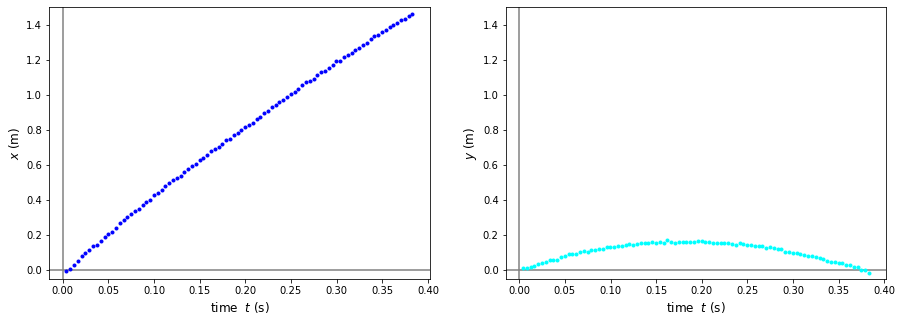

In [19]:
import numpy as np
import matplotlib.pyplot as plt


DataFileInput = './data/projectile_data.txt'

t, x, y = np.loadtxt(DataFileInput, skiprows = 2, unpack = True)

figure01 = plt.figure(1, figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x, 'o', color = 'blue', markersize = 3)
plt.xlabel('time  $t$ (s)', fontsize = 12)
plt.ylabel('$x$ (m)', fontsize = 12)
plt.ylim(ymin = -0.05, ymax = 1.5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)

plt.subplot(1, 2, 2)
plt.plot(t, y, 'o', color = 'cyan', markersize = 3)
plt.xlabel('time  $t$ (s)',  fontsize = 12)
plt.ylabel('$y$ (m)', fontsize = 12)
plt.ylim(ymin = -0.05, ymax = 1.5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)

plt.show()

We can observe that the behaviour of the $x$ coordinate of the ping pong ball as a function of $t$ is almost linear, while the behaviour of its $y$ coordinate appears as a parabola. 

&nbsp;

## Trajectory

Using the experimental data available we can reconstruct a plot of the trajectory.

To this aim is important to assign the same scale and the same units to both the axes of the plot.

Text(0, 0.5, '$y$ (m)')

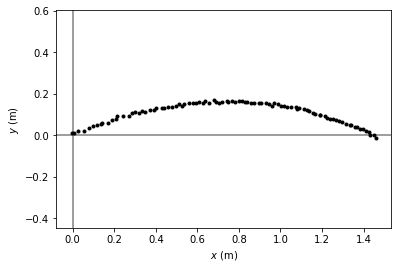

In [20]:
figure02, axs = plt.subplots()
axs.plot(x, y, 'o', color = 'k', markersize = 3)
axs.set(ylim=(-0.05, 0.30))
axs.axis('equal')
#axs.set_aspect('equal', 'box')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)

axs.set_xlabel('$x$ (m)')
axs.set_ylabel('$y$ (m)')

## Data processing

### Calculating the components of the velocity vector

We use the data available for evaluating the components of the velocity vector

$$ v_x = \dfrac{\Delta x}{\Delta t} $$

$$ v_y = \dfrac{\Delta y}{\Delta t} $$

The calculated values of $v_x$ and $v_y$ are shown as a function of time. 

For comparison the $x(t)$ graph and the $y(t)$ graph are also reported in the same figure (see below).

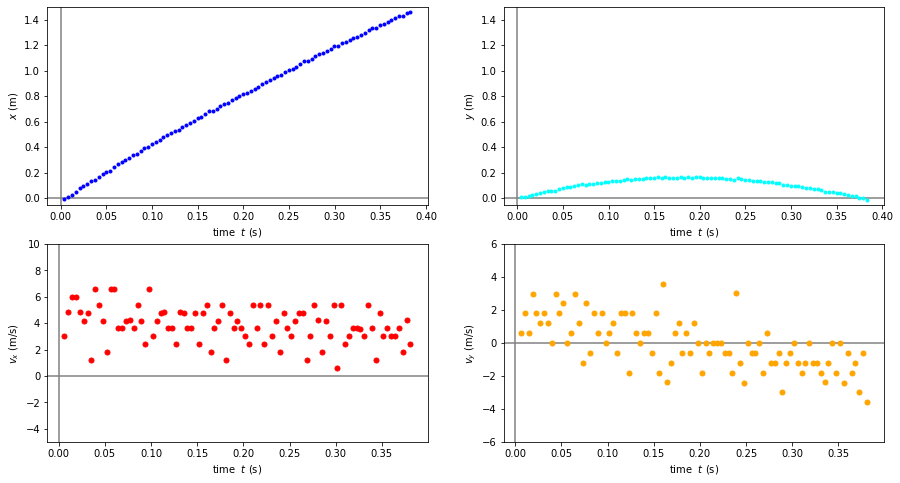

In [21]:
delta_t = np.diff(t)
delta_x = np.diff(x)
vx = delta_x / delta_t

delta_y = np.diff(y)
vy = delta_y / delta_t

t_prime = t[:-1] + (delta_t/2)

figure03 = plt.figure(3, figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.plot(t, x, 'o', color = 'blue', markersize = 3)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$x$ (m)')
plt.ylim(ymin = -0.05, ymax = 1.5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)

plt.subplot(2, 2, 2)
plt.plot(t, y, 'o', color = 'cyan', markersize = 3)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$y$ (m)')
plt.ylim(ymin = -0.05, ymax = 1.5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)

plt.subplot(2, 2, 3)
plt.plot(t_prime, vx, 'o', color='red', markersize = 5)
plt.ylim(ymin = -5, ymax = 10)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$v_x$ (m/s)')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)


plt.subplot(2, 2, 4)
plt.plot(t_prime, vy, 'o', color='orange', markersize = 5)
plt.ylim(ymin = -6, ymax = +6)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$v_y$ (m/s)')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)


plt.show()

## Data analysis

### Component $x$ of the velocity
If we assume that the behaviour of $x$ vs. $t$ is approximatively linear, this implies that $v_x$ would have a constant value. So, if we consider that $v_x$ has a constant value, we can evaluate it as an average of the $v_x$ values previously computed concerning all the subsequent time intervals available.
This is quickly done using the **np.mean** function of the **numpy** module in Python.

In [22]:
vx_mean = np.mean(vx)  # valore medio della componente v_x

print('\nMean value of v_x = ', vx_mean, '(m/s) \n')


Mean value of v_x =  3.866314904591666 (m/s) 



### Component $y$ of the velocity
A simple strategy to analyze the data concerning the $y$ component of the velocity is that of assuming that the behaviour of $v_y$ vs. $t$ is linear. Under such assumption, the slope (the angular coefficient) of the straight line gives the value of the acceleration $a$.


In [23]:
def LineFit(x,y):
    x_avg = x.mean()
    slope =  (y*(x-x_avg)).sum()/(x*(x-x_avg)).sum()
    y_intercept = y.mean() - slope * x_avg
    return slope, y_intercept

a_est, intercept = LineFit(t_prime, vy)


print('\n Estimated value of the acceleration (from the linear fit)')
print('\n a = {0:0.3} m/s^2 \n'.format(a_est))
#print('$intercept$', intercept, '(m/s', '\n')


 Estimated value of the acceleration (from the linear fit)

 a = -9.2 m/s^2 



### Graphical representation of the results

With the following code we put together the results obtained above in a single figure.

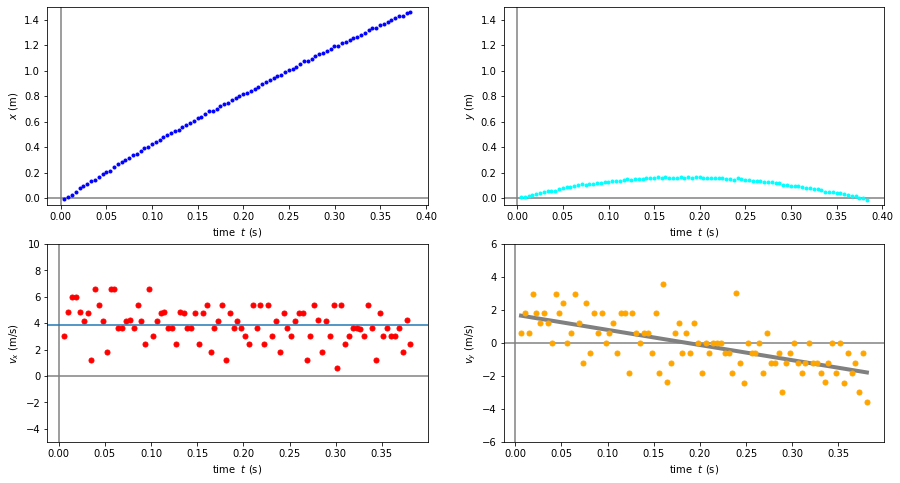

In [24]:
figure04 = plt.figure(4, figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.plot(t, x, 'o', color = 'blue', markersize = 3)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$x$ (m)')
plt.ylim(ymin = -0.05, ymax = 1.5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)


plt.subplot(2, 2, 2)
plt.plot(t, y, 'o', color = 'cyan', markersize = 3)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$y$ (m)')
plt.ylim(ymin = -0.05, ymax = 1.5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)


plt.subplot(2, 2, 3)
plt.plot(t_prime, vx, 'o', color='red', markersize = 5)
plt.ylim(ymin = -5, ymax = 10)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$v_x$ (m/s)')
plt.axhline(y = vx_mean)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)

plt.subplot(2, 2, 4)
plt.plot(t_prime, vy, 'o', color='orange', markersize = 5)
plt.ylim(ymin = -6, ymax = +6)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$v_y$ (m/s)')
plt.plot(t_prime, a_est*t_prime + intercept, '-', color='gray', linewidth = 4, zorder = -1)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)

plt.show()

### Get a feel of

Looking at the plots and reading the results obtained from the calculations we can collect lot of information about our experiment.

* The **horizontal range** is of about 1.4 m
* The highest point of the trajectory is about 20 cm above the initial altitude of the ball.
* The $x$-component of the velocity of the ping pong ball has the value of about 4 m/s.
* The $y$-component of the velocity has the initial value of about 2 m/s.
    * This value decreases linearly as a function of time and becomes 0 when the object is in the highest point of its trajectory.
    * At longer times the $y$-component of the velocity becomes negative, indicating that the object is moving in the opposite direction with respect to the positive direction of the $y$-axis.

What is the magnitude of the initial velocity vector? 

What is the value of the launch angle?

&nbsp;

### Conclusions
We can think about the motion of the ping pong ball as a projectile motion. We can describe the experimental results assuming that :
* the $x$-component of the velocity is constant
* the $y$-component of the velocity varies with a linear law.

From these considerations and from the analysis of the data, it follows that the Cartesian components of the acceleration are:
- $a_x = 0$
- $a_y = $ constant   (and has a negative sign)
    * In particular from the data we have $a_y\simeq -9.2 m/s^2$
    
So the projectile motion develops along the $x$-axis as a motion with constant speed, while the coordinate $y$ of the point-like body changes with time as in a motion with constant acceleration, whose value is comparable with that of **freely falling objects** (-$9.8 m/s^2$)

&nbsp;

### Insights

Looking at the plot of $x$ vs. $t$ we can see that the slope of the curve slightly decreases as the time increases. This suggests that the instantaneous value of $v_x$ decreases as a function of time.

Can we ascribe this to the effect of air friction on the motion?

&nbsp;

## What we have learned

*Physics*
* How to carry out an experiment using a smartphone and the software *Tracker*
* How to analyze experimental data

*Python*
* How to import a video in a Jupyter Notbook.
* How to import data from a text file
* How to work on data arrays with the **numpy** module

&nbsp;


## References and notes
#### Video
The original video has been recorded with a smartphone Samsung S9 in slow motion mode, at 30 fps, with a resolution of 1080 x 1920 pixel.

#### Tracker
Tracker is a free video analysis and modeling tool designed to be used in physics education.
[![Tracker](./img/tracker_logo.png)](https://physlets.org/tracker/)

#### Using numpy
David J. Pine, [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

&nbsp;

### Copyright and License
--------------------------
(c) 2021 Andrea Mandanici, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution  <a rel="license" href="https://creativecommons.org/licenses/by/4.0">CC BY 4.0</a> 
 and all code is under [BSD 3-Clause License](https://opensource.org/licenses/BSD-3-Clause).